In [128]:
import pandas as pd
import csv
import sqlalchemy as sqAl
from sqlalchemy import create_engine




psql_username = 'postgres'
from config import psql_password 
database_name = 'postgres'
host = 'illinoiseducation.cseojgcrzzgi.us-east-1.rds.amazonaws.com'

connection_string = f'postgresql://{psql_username}:{psql_password}@{host}:5432/{database_name}'

engine = create_engine(connection_string)

In [129]:
regression_df = pd.read_sql("select * from test_scores", engine)
regression_df['ELA'] = pd.to_numeric(regression_df['ELA'])
regression_df['Math'] = pd.to_numeric(regression_df['Math'])
regression_df = regression_df.astype({'ELA': int, 'Math': int})
regression_df.head(2)

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260001,Adams,10,Seymour High School,Payson,524,489
1,010010020260001,Adams,20,Liberty High School,Liberty,500,485


In [130]:
general_df = pd.read_sql("select * from high_school", engine)
general_df

,RCDTS,Type,District,School Type,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,...,Teacher Retention Rate,# of 12 graders who took advanced Courses,Avg Number of days of Physical Education Per Week Per Student,Community College Remediation %,Avg Class Size - High School,Chronic Absenteeism,Number of students who took AP Exams Grade 10,Number of students who passed AP Exams Grade 12,Chronic Absenteeism - Low Income,Low Income Count
0,010010010260001,School,Payson CUSD 1,HIGH SCHOOL,Payson,Adams,UNIT,MEDIUM,246.0,43.9,...,90.6,NaN,5.0,37.5,13.0,12.0,NaN,NaN,21.6,107.994
1,010010020260001,School,Liberty CUSD 2,HIGH SCHOOL,Liberty,Adams,UNIT,MEDIUM,281.0,22.4,...,84.8,23.0,3.0,20.0,22.0,2.5,NaN,NaN,7.8,62.944
2,010010030260001,School,Central CUSD 3,HIGH SCHOOL,Camp Point,Adams,UNIT,MEDIUM,245.0,42.0,...,83.7,15.0,5.0,32.3,15.0,11.9,NaN,NaN,19.6,102.900
3,010010040260001,School,CUSD 4,HIGH SCHOOL,Mendon,Adams,UNIT,MEDIUM,209.0,27.3,...,83.7,30.0,5.0,31.6,11.0,17.3,NaN,NaN,18.9,57.057
4,010011720220003,School,Quincy SD 172,HIGH SCHOOL,Quincy,Adams,UNIT,LARGE,1753.0,50.3,...,81.9,151.0,5.0,29.2,20.0,31.3,35.0,120.0,47.5,881.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,56099207U260001,School,Peotone CUSD 207U,HIGH SCHOOL,Peotone,Will,UNIT,MEDIUM,493.0,19.3,...,75.5,54.0,4.0,42.6,16.0,8.0,NaN,52.0,14.0,95.149
649,56099209U260001,School,Wilmington CUSD 209U,HIGH SCHOOL,Wilmington,Will,UNIT,MEDIUM,465.0,36.6,...,89.4,72.0,3.0,61.8,19.0,14.4,NaN,NaN,21.0,170.190
650,56099255U260001,School,Reed Custer CUSD 255U,HIGH SCHOOL,Braidwood,Will,UNIT,MEDIUM,477.0,32.7,...,83.8,85.0,4.0,41.0,22.0,8.3,NaN,18.0,1.3,155.979
651,56099365U260007,School,Valley View CUSD 365U,HIGH SCHOOL,Bolingbrook,Will,UNIT,LARGE,3550.0,59.4,...,90.0,410.0,5.0,45.1,19.0,32.5,261.0,511.0,39.5,2108.700


In [131]:
gen_df = general_df.filter(['RCDTS',
                            'Teacher Retention Rate',
                            '# of 12 graders who took advanced Courses',
                            'Avg Number of days of Physical Education Per Week Per Student',
                            'Community College Remediation %',
                            'Avg Class Size – All Grades',
                            'Chronic Absenteeism',
                            'Chronic Absenteeism - Low Income'                            
                           ], axis = 1)
gen_df.rename(columns = {'Teacher Retention Rate':'TeachRetRate'}, inplace = True)
gen_df.rename(columns = {'# of 12 graders who took advanced Courses':'advCourses'}, inplace = True)
gen_df.rename(columns = {'Avg Number of days of Physical Education Per Week Per Student':'PhyEd'}, inplace = True)
gen_df.rename(columns = {'Community College Remediation %':'ComCollege'}, inplace = True)
gen_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
gen_df.rename(columns = {'Chronic Absenteeism':'ChronicAbsentee'}, inplace = True)
gen_df.rename(columns = {'Chronic Absenteeism - Low Income':'ChronicLowIncome'}, inplace = True)

gen_df

,RCDTS,TeachRetRate,advCourses,PhyEd,ComCollege,ClassSize,ChronicAbsentee,ChronicLowIncome
0,010010010260001,90.6,NaN,5.0,37.5,16.0,12.0,21.6
1,010010020260001,84.8,23.0,3.0,20.0,20.0,2.5,7.8
2,010010030260001,83.7,15.0,5.0,32.3,15.0,11.9,19.6
3,010010040260001,83.7,30.0,5.0,31.6,11.0,17.3,18.9
4,010011720220003,81.9,151.0,5.0,29.2,20.0,31.3,47.5
...,...,...,...,...,...,...,...,...
648,56099207U260001,75.5,54.0,4.0,42.6,16.0,8.0,14.0
649,56099209U260001,89.4,72.0,3.0,61.8,19.0,14.4,21.0
650,56099255U260001,83.8,85.0,4.0,41.0,22.0,8.3,1.3
651,56099365U260007,90.0,410.0,5.0,45.1,19.0,32.5,39.5


In [132]:
df = pd.merge(regression_df, gen_df, on = "RCDTS", how = "inner")
df = df.dropna()
df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math,TeachRetRate,advCourses,PhyEd,ComCollege,ClassSize,ChronicAbsentee,ChronicLowIncome
1,010010020260001,Adams,20,Liberty High School,Liberty,500,485,84.8,23.0,3.0,20.0,20.0,2.5,7.8
2,010010030260001,Adams,30,Central High School,Camp Point,490,488,83.7,15.0,5.0,32.3,15.0,11.9,19.6
3,010010040260001,Adams,40,Unity High School,Mendon,505,485,83.7,30.0,5.0,31.6,11.0,17.3,18.9
4,010011720220003,Adams,1720,Quincy Sr High School,Quincy,489,473,81.9,151.0,5.0,29.2,20.0,31.3,47.5
5,010050010260001,Brown,10,Brown County High School,Mount Sterling,523,493,70.0,37.0,5.0,21.4,12.0,12.6,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,56099207U260001,Will,207U,Peotone High School,Peotone,514,493,75.5,54.0,4.0,42.6,16.0,8.0,14.0
632,56099209U260001,Will,209U,Wilmington High School,Wilmington,482,460,89.4,72.0,3.0,61.8,19.0,14.4,21.0
633,56099255U260001,Will,255U,Reed-Custer High School,Braidwood,480,484,83.8,85.0,4.0,41.0,22.0,8.3,1.3
634,56099365U260007,Will,365U,Bolingbrook High School,Bolingbrook,490,490,90.0,410.0,5.0,45.1,19.0,32.5,39.5


In [133]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

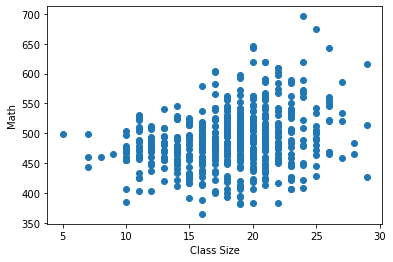

(521,)


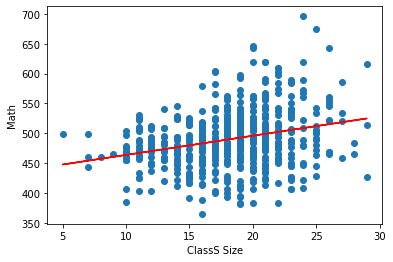

Coefficient  [3.21759001]
Intercept  431.5732682217066


In [134]:
plt.scatter(df.ClassSize, df.Math)
plt.xlabel('Class Size')
plt.ylabel('Math')
plt.show()

X = df.ClassSize.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('ClassS Size')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_Math_ClassSize.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

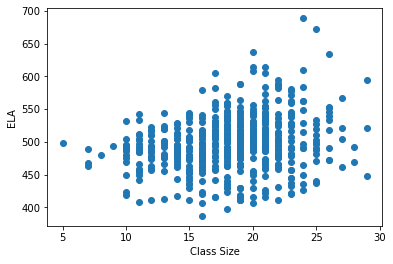

(521,)


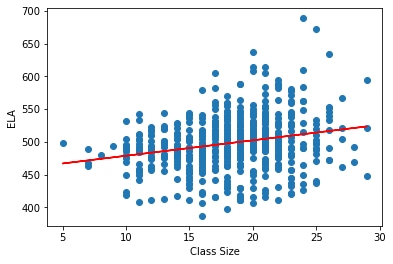

Coefficient  [2.36133298]
Intercept  455.28342543385816


In [135]:
plt.scatter(df.ClassSize, df.ELA)
plt.xlabel('Class Size')
plt.ylabel('ELA')
plt.show()

X = df.ClassSize.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Class Size')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_ELA_ClassSize.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

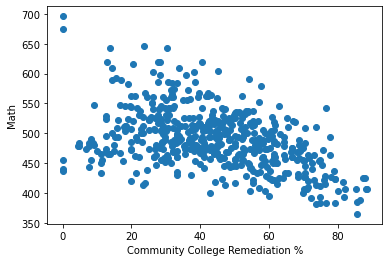

None
(521,)


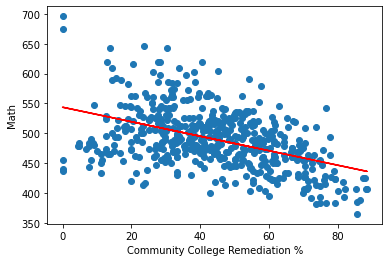

None
Coefficient  [-1.21359122]
Intercept  543.6793899409827


In [136]:
plt.scatter(df.ComCollege, df.Math)
plt.xlabel('Community College Remediation %')
plt.ylabel('Math')
print(plt.show())

X = df.ComCollege.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Community College Remediation %')
plt.ylabel('Math')
plt.savefig('HS_Graphs/HS_Math_CommunityCollegeRemed.png', dpi = 100, bbox_inches = 'tight')
plt.plot(X, y_pred, color='red')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

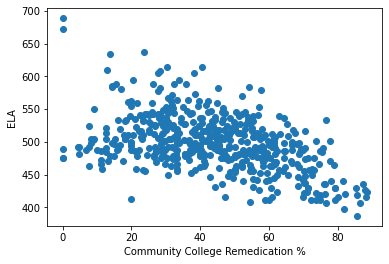

None
(521,)


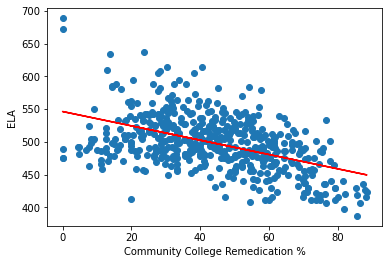

None
Coefficient  [-1.09438571]
Intercept  546.5027515843168


In [137]:
plt.scatter(df.ComCollege, df.ELA)
plt.xlabel('Community College Remedication %')
plt.ylabel('ELA')
print(plt.show())

X = df.ComCollege.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Community College Remedication %')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_ELA_CommunityCollegeRemd.png', dpi = 100, bbox_inches = 'tight')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

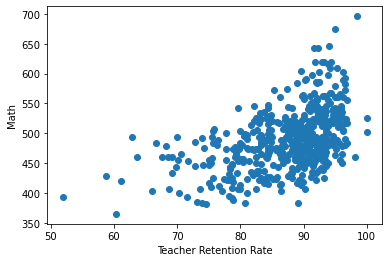

None
(521,)


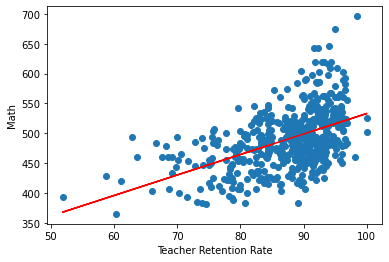

None
Coefficient  [3.43697061]
Intercept  189.51281455112877


In [138]:
plt.scatter(df.TeachRetRate, df.Math)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('Math')
print(plt.show())

X = df.TeachRetRate.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_Math_TeacherRetentionRate.png', dpi = 100, bbox_inches = 'tight')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

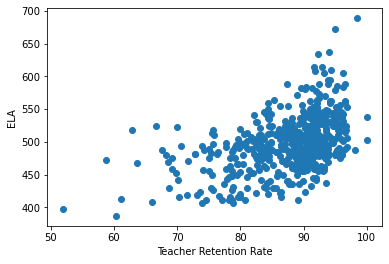

None
(521,)


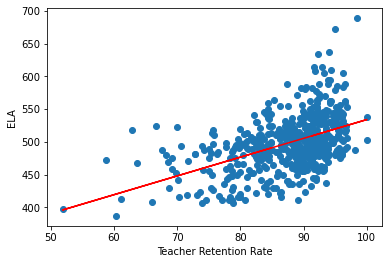

None
Coefficient  [2.87264184]
Intercept  246.9727768397104


In [139]:
plt.scatter(df.TeachRetRate, df.ELA)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('ELA')
print(plt.show())

X = df.TeachRetRate.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_ELA_TeacherRetentionRate.png', dpi = 100, bbox_inches = 'tight')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

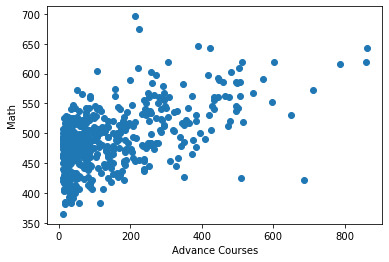

(521,)


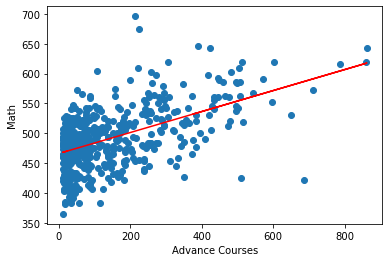

Coefficient  [0.17564605]
Intercept  466.21780366569124


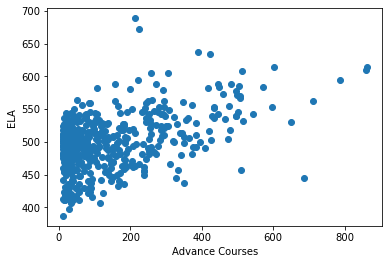

(521,)


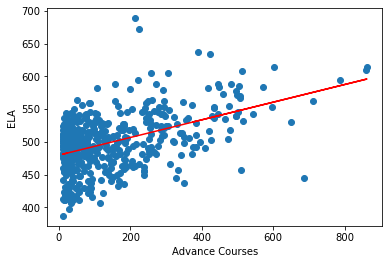

Coefficient  [0.13487677]
Intercept  479.88636474106335


In [140]:
plt.scatter(df.advCourses, df.Math)
plt.xlabel('Advance Courses')
plt.ylabel('Math')
plt.show()

X = df.advCourses.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Advance Courses')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_Math_AdvanceCourses.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)


plt.scatter(df.advCourses, df.ELA)
plt.xlabel('Advance Courses')
plt.ylabel('ELA')
plt.show()

X = df.advCourses.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Advance Courses')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_ELA_AdvanceCourses.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

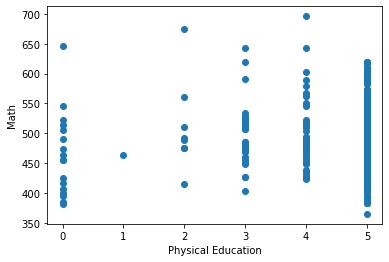

(521,)


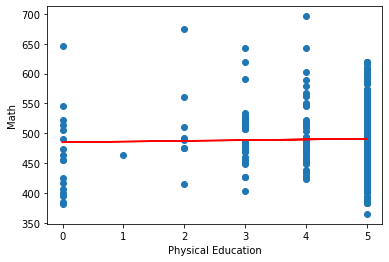

Coefficient  [1.20344002]
Intercept  484.9033138501944


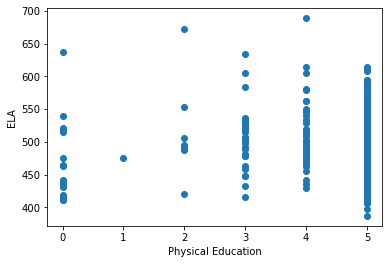

(521,)


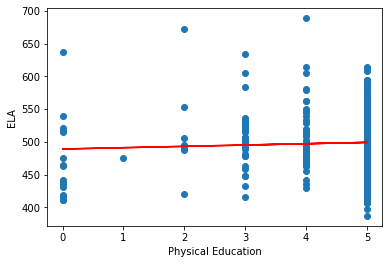

Coefficient  [2.0220698]
Intercept  489.2275664958673


In [141]:
plt.scatter(df.PhyEd, df.Math)
plt.xlabel('Physical Education')
plt.ylabel('Math')
plt.show()

X = df.PhyEd.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Physical Education')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_Math_PhyEd.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)


plt.scatter(df.PhyEd, df.ELA)
plt.xlabel('Physical Education')
plt.ylabel('ELA')
plt.show()

X = df.PhyEd.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Physical Education')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_ELA_PhyEd.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

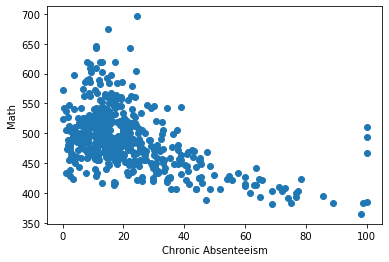

(521,)


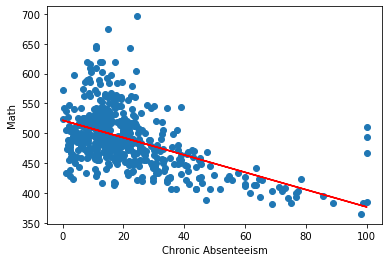

Coefficient  [-1.45244627]
Intercept  521.8062112265198


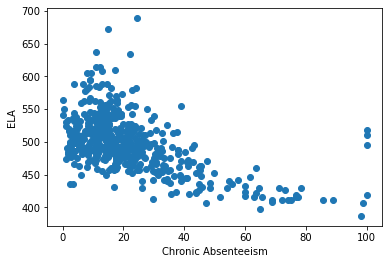

(521,)


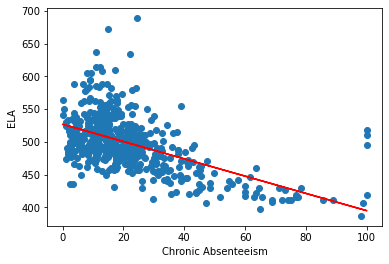

Coefficient  [-1.32093818]
Intercept  527.0194318584458


In [142]:
plt.scatter(df.ChronicAbsentee, df.Math)
plt.xlabel('Chronic Absenteeism')
plt.ylabel('Math')
plt.show()

X = df.ChronicAbsentee.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Chronic Absenteeism')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_Math_ChronicAbs.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)


plt.scatter(df.ChronicAbsentee, df.ELA)
plt.xlabel('Chronic Absenteeism')
plt.ylabel('ELA')
plt.show()

X = df.ChronicAbsentee.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Chronic Absenteeism')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_ELA_ChronicAbs.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

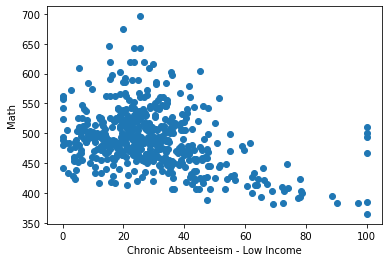

(521,)


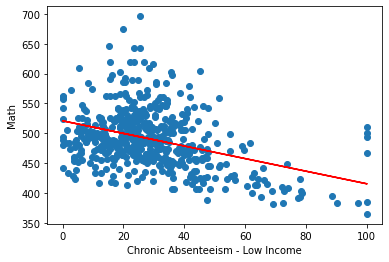

Coefficient  [-1.05473273]
Intercept  520.9069363497026


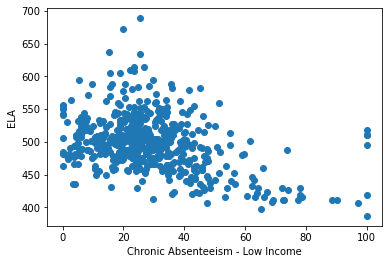

(521,)


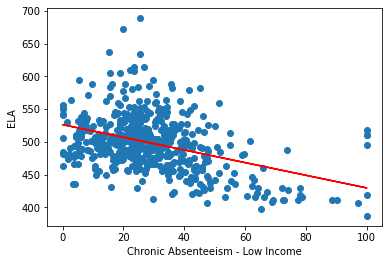

Coefficient  [-0.96733447]
Intercept  526.4359235050802


In [143]:
plt.scatter(df.ChronicLowIncome, df.Math)
plt.xlabel('Chronic Absenteeism - Low Income')
plt.ylabel('Math')
plt.show()

X = df.ChronicLowIncome.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Chronic Absenteeism - Low Income')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_Math_ChronicAbsLowInc.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)


plt.scatter(df.ChronicLowIncome, df.ELA)
plt.xlabel('Chronic Absenteeism - Low Income')
plt.ylabel('ELA')
plt.show()

X = df.ChronicLowIncome.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Chronic Absenteeism - Low Income')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('HS_Graphs/HS_ELA_ChronicAbsLowInc.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)